# NeuroMat (Centro de Pesquisa, Inovação e Difusão em Neuromatemática)


In [2]:

import requests
import json

url = "https://query.wikidata.org/sparql"
query = """SELECT distinct  (COUNT(?autores) AS ?Pesquisadores) 
  WHERE {   
    ?artigos wdt:P2860 wd:Q56592766.    
    ?artigos wdt:P361 wd:Q18477654; wdt:P50 ?autores.
  }"""
params = {
    "query": query,
    "format": "json"
}


result = requests.get(url=url, params=params, headers={'User-agent': 'WikiMI QAM 1.0'})
data = result.json()
pesquisadores = data['results']['bindings'][0]['Pesquisadores']['value']

url = "https://query.wikidata.org/sparql"
query = """SELECT distinct  (COUNT(?artigos) AS ?Artigos) WHERE {
  ?artigos wdt:P361 wd:Q18477654.
  ?artigos wdt:P2860 wd:Q56592766.   
}"""
params = {
    "query": query,
    "format": "json"
}


result = requests.get(url=url, params=params, headers={'User-agent': 'WikiMI QAM 1.0'})
data = result.json()

artigos = data['results']['bindings'][0]['Artigos']['value']

In [3]:
from IPython.core.display import display, HTML


text1 = "&nbsp; O artigo <a href='https://www.wikidata.org/wiki/Q56592766' target='_blank'>Infinite Systems of Interacting Chains with Memory of Variable Length—A Stochastic Model for Biological Neural Nets</a>,  escrito por "

text2 =  " <a href='https://www.wikidata.org/wiki/Q17489997' target='_blank' >Antonio Galves</a> "

E = " e "

text3 =  " <a href='https://www.wikidata.org/wiki/Q59267761' target='_blank' >Eva Löcherbach</a> "
 
text4 = " em 2013, constitui a pedra angular do <a href='https://www.wikidata.org/wiki/Q18477654' target='_blank' >Centro de Pesquisa, Inovação e Difusão em Neuromatemática (CEPID NeuroMat). </a>"

text5 = "Este trabalho introduziu um novo modelo para redes neurais e lançou uma nova linha de investigação. "

paragrafo1 =  text1 + text2 + E +text3 + text4 + text5

display(HTML("<font size='+1'>" + paragrafo1 + "</font>"))





In [4]:
import urllib.parse
from IPython.display import IFrame
baseurl='https://query.wikidata.org/embed.html#'

def wdq(query='',width=600,height=500):
  return IFrame(baseurl+urllib.parse.quote(query), width=width, height=height)

query = """SELECT distinct (?artigos as ?QID) ?artigosLabel   WHERE {
  ?artigos wdt:P921 wd:Q24575409.   
   SERVICE wikibase:label { bd:serviceParam wikibase:language "en". }                         
}"""

params = {
    "query": query,
    "format": "json"
}

result = requests.get(url=url, params=params, headers={'User-agent': 'WikiMI QAM 1.0'})
data = result.json()

revistas = data['results']['bindings'] 
tam = len(revistas)
 

revistas_parceiras = "<a href='" + revistas[0]['QID']['value']+ "' target='_blank' >" + revistas[0]['artigosLabel']['value'] + "</a>"


for i in range(1, tam):    
    if (tam - i) == 1:
      revistas_parceiras = revistas_parceiras + " e <a href='" + revistas[i]['QID']['value']+ "' target='_blank'  > " + revistas[i]['artigosLabel']['value'] + "</a>"
    else:
      revistas_parceiras = revistas_parceiras + ", <a href='" + revistas[i]['QID']['value']+"'  target='_blank' > " + revistas[i]['artigosLabel']['value'] + "</a>"
    
    
text6 = " &nbsp; No contexto do CEPID NeuroMat, participaram desta linha  %s pesquisadores que produziram %s artigos com base no modelo de 2013 ou contribuições posteriores. "
paragrafo11 = text6 % (pesquisadores, artigos)
paragrafo12 = "O modelo fundador do NeuroMat, chamado <a href='https://www.wikidata.org/wiki/Q24575409'>Modelo Galves-Löcherbach</a>, foi também o objeto de análise de publicações não filiadas ao NeuroMat, como: "
paragrafo121 = "O gráfico seguinte ilustra a rede dos colaboradores do modelo fundador do NeuroMat. "

paragrafo11 = paragrafo11 + paragrafo12 + revistas_parceiras +". "  + paragrafo121


display(HTML("<font size='+1'>" + paragrafo11 + " </font>"))

    

In [5]:
wdq(width=700,height=500,query="""#defaultView:Graph
SELECT DISTINCT ?Autor1 ?Autor1Label ?rgb ?Autor2 ?Autor2Label
WITH {
  SELECT ?Obra WHERE {
    SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en". }
    ?Obra wdt:P2860 wd:Q56592766.    
    ?Obra wdt:P361 wd:Q18477654; wdt:P50 ?autores.
  }
} AS %artigos
WITH {
  SELECT ?Autor1 ?Obra WHERE {
    INCLUDE %artigos.
    SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en". }
    ?Obra wdt:P50 ?Autor1.
  }
} AS %autor1
WITH {
  SELECT ?Autor1 ?Autor2 ?Obra WHERE {
    INCLUDE %artigos.
    INCLUDE %autor1.
    SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en". }
    ?Obra wdt:P50 ?Autor2.
    FILTER(?Autor1 != ?Autor2)
  }
  GROUP BY ?Autor1 ?Autor2 ?Obra
} AS %autor2
WHERE {
  INCLUDE %autor2.
  OPTIONAL { ?Autor1 wdt:P21 ?Gênero . }
  BIND( IF(?Gênero = wd:Q6581097, "0000ff","ff0000") AS ?rgb)
   
  SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en". }
}
""")


In [38]:
query = """SELECT  (count( distinct ?revista) as ?num_revistas) WHERE {
  ?artigos wdt:P2860 wd:Q56592766.   
  ?artigos wdt:P1433 ?revista.       
  FILTER(?revista != wd:Q118398) . 
  FILTER(?revista != wd:Q107624307) . 
  FILTER(?revista != wd:Q107004545) .  
  FILTER(?revista != wd:Q19835482) .        
} 
# UFSCAR repository (Q107624307)
# arXiv (Q118398 )
# Repositório da Produção Intelectual da USP (Q107004545) 
# bioRxiv (Q19835482) """

params = {
    "query": query,
    "format": "json"
}

result = requests.get(url=url, params=params, headers={'User-agent': 'WikiMI QAM 1.0'})
data = result.json()

num_revistas = data['results']['bindings'][0]['num_revistas']['value']


In [39]:

text7 = "&nbsp;  O artigo que lançou o <a href='https://www.wikidata.org/wiki/Q24575409'>Modelo Galves-Löcherbach</a> teve impacto em várias áreas do conhecimento. "
   
text8 = "As publicações associadas ao novo modelo deram-se em %s revistas acadêmicas, em áreas como probabilidade, estatística, computação e neurobiologia. "

paragrafo2 =  text7 + text8  % (num_revistas)


display(HTML("<font size='+1'>" + paragrafo2 + "</font>"))

#e

In [24]:
query = """SELECT distinct ?revista ?revistaLabel  ?qualisLabel ?countryLabel WHERE {
    OPTIONAL { ?revista wdt:P9683 ?qualis .}
    OPTIONAL {
      ?revista ?p  ?country.  
      VALUES ?p { wdt:P495 wdt:P17 }  
    }   
    { SELECT distinct  ?revista    WHERE {        
       ?artigos wdt:P2860 wd:Q56592766.          
       ?artigos wdt:P1433 ?revista.         
        FILTER(?revista != wd:Q118398) . 
        FILTER(?revista != wd:Q107624307) . 
        FILTER(?revista != wd:Q107004545) .  
        FILTER(?revista != wd:Q19835482) .      
      }   
    Limit 50
  }
  SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en, fr, de". }
} 
Order by ASC (?qualisLabel) """

params = {
    "query": query,
    "format": "json"
}

result = requests.get(url=url, params=params, headers={'User-agent': 'WikiMI QAM 1.0'})
data = result.json()
revistas = data['results']['bindings']

tam = len(revistas)

tableHTMLInicio = "<table width='700' border='2' cellpadding='5' class='center'>"
tableHTMLFim = "</table>"
tableRevistaNP = ""
tableRevista = "<tr><th align='center' valign='center'><p>Revistas das publicações associadas ao Modelo de Galves e Löcherbach</p></th><th>Qualis Capes</th><th>Pais da revista</th><tr>"

for i in range(0, tam):       
    revista = revistas[i]['revista']['value']
    revistaLabel = revistas[i]['revistaLabel']['value']           
    
    if "countryLabel" not in revistas[i]:
        pais = ""
    else:
        pais = revistas[i]['countryLabel']['value']
    
    qualis = revistas[i]['qualisLabel']['value']
    if len(qualis) > 2:        
        tableRevistaNP = tableRevistaNP + "<tr><td  align='center' valign='center'> <p><a href='" + revista + "' target='_blank' > " + revistaLabel + "</a></p> </td><td>NP</td><td>"+pais+"</td></tr>"
    else:     
        tableRevista = tableRevista + "<tr><td  align='center' valign='center'> <p><a href='" + revista + "' target='_blank' > " + revistaLabel + "</a></p> </td><td> "+qualis+"</td><td>"+pais+"</td></tr>"        

tableHTML =  tableHTMLInicio + tableRevista + tableRevistaNP+tableHTMLFim

display(HTML( tableHTML ))


Revistas das publicações associadas ao Modelo de Galves e Löcherbach,Qualis Capes,Pais da revista
PLOS Computational Biology,A1,United States of America
Annales de l'Institut Henri Poincaré,A1,
Complex Networks IX: Proceedings of the 9th Conference on Complex Networks CompleNet 2018,A1,
Scientific Reports,A2,United Kingdom
Physical Review Research,A2,United States of America
Entropy,A4,Switzerland
Journal of Statistical Physics,B1,United States of America
Mathematics,C,Switzerland
Frontiers in Neuroinformatics,NP,Switzerland
Bernoulli,NP,Kingdom of the Netherlands


## Publicações

In [25]:
url = "https://query.wikidata.org/sparql"
query = """SELECT (count (DISTINCT ?artigos) as ?Artigos) WHERE {
      ?artigos wdt:P361 wd:Q18477654.  
    }"""
params = {
    "query": query,
    "format": "json"
}

result = requests.get(url=url, params=params, headers={'User-agent': 'WikiMI QAM 1.0'})
data = result.json()

artigos = data['results']['bindings'][0]['Artigos']['value']


query = """SELECT distinct (count( ?itens) as ?Citacoes) WHERE {
      ?artigos wdt:P361 wd:Q18477654.
      ?itens wdt:P2860 ?artigos.    
    }"""
params = {
    "query": query,
    "format": "json"
}    
result = requests.get(url=url, params=params, headers={'User-agent': 'WikiMI QAM 1.0'})
data = result.json()

citacoes = data['results']['bindings'][0]['Citacoes']['value']

query = """SELECT distinct (COUNT(?num_autores) as ?autores)  WHERE {
  ?artigos wdt:P361 wd:Q18477654.
  ?artigos wdt:P50 ?num_autores.   
 }"""
 
params = {
    "query": query,
    "format": "json"
}    
result = requests.get(url=url, params=params, headers={'User-agent': 'WikiMI QAM 1.0'})
data = result.json()

num_autores = data['results']['bindings'][0]['autores']['value']    


In [13]:
text9 = "&nbsp;   Desde a sua criação em 2013, a equipe de pesquisadores do CEPID NeuroMat produziu %s artigos e foram citados %s vezes. "
text91 = "Como ilustrado abaixo, a produção dependeu de uma rede ampla de co-autores, com %s pessoas. "
paragrafo3 = text9   % (artigos, citacoes)
paragrafo3 =  paragrafo3 +text91
paragrafo3 = paragrafo3 %(num_autores)

paragrafo31 = "<a href='https://query.wikidata.org/#%23defaultView%3AGraph%0ASELECT%20DISTINCT%20%3FAutor1%20%3FAutor1Label%20%3Frgb%20%3FAutor2%20%3FAutor2Label%0AWITH%20%7B%0A%20%20SELECT%20%3FObra%20WHERE%20%7B%0A%20%20%20%20SERVICE%20wikibase%3Alabel%20%7B%20bd%3AserviceParam%20wikibase%3Alanguage%20%22%5BAUTO_LANGUAGE%5D%2Cen%22.%20%7D%0A%20%20%20%20%3FObra%20wdt%3AP361%20wd%3AQ18477654.%0A%20%20%7D%0A%7D%20AS%20%25artigos%0AWITH%20%7B%0A%20%20SELECT%20%3FAutor1%20%3FObra%20WHERE%20%7B%0A%20%20%20%20INCLUDE%20%25artigos.%0A%20%20%20%20SERVICE%20wikibase%3Alabel%20%7B%20bd%3AserviceParam%20wikibase%3Alanguage%20%22%5BAUTO_LANGUAGE%5D%2Cen%22.%20%7D%0A%20%20%20%20%3FObra%20wdt%3AP50%20%3FAutor1.%0A%20%20%7D%0A%7D%20AS%20%25autor1%0AWITH%20%7B%0A%20%20SELECT%20%3FAutor1%20%3FAutor2%20%3FObra%20WHERE%20%7B%0A%20%20%20%20INCLUDE%20%25artigos.%0A%20%20%20%20INCLUDE%20%25autor1.%0A%20%20%20%20SERVICE%20wikibase%3Alabel%20%7B%20bd%3AserviceParam%20wikibase%3Alanguage%20%22%5BAUTO_LANGUAGE%5D%2Cen%22.%20%7D%0A%20%20%20%20%3FObra%20wdt%3AP50%20%3FAutor2.%0A%20%20%20%20FILTER%28%3FAutor1%20%21%3D%20%3FAutor2%29%0A%20%20%7D%0A%20%20GROUP%20BY%20%3FAutor1%20%3FAutor2%20%3FObra%0A%7D%20AS%20%25autor2%0AWHERE%20%7B%0A%20%20INCLUDE%20%25autor2.%0A%20%20OPTIONAL%20%7B%20%3FAutor1%20wdt%3AP21%20%3FG%C3%AAnero%20.%20%7D%0A%20%20BIND%28%20IF%28%3FG%C3%AAnero%20%3D%20wd%3AQ6581097%2C%20%223182BD%22%2C%20%22E6550D%22%29%20AS%20%3Frgb%29%0A%20%20SERVICE%20wikibase%3Alabel%20%7B%20bd%3AserviceParam%20wikibase%3Alanguage%20%22%5BAUTO_LANGUAGE%5D%2Cen%22.%20%7D%0A%7D' target='_blank'>Experimente a consulta!" +"</a>"


   
display(HTML("<font size='+1'>" + paragrafo3 + paragrafo31 +"</font>"))


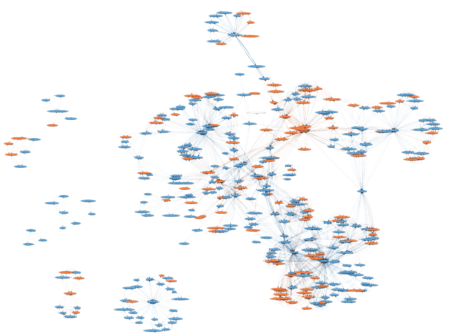

In [26]:
from IPython.display import Image
Image("img/Coautores.png")

In [27]:
query = """SELECT ?num_artigos ?qualisLabel ?journalLabel WHERE {
    ?journal wdt:P9683 ?qualis .
    {
      SELECT (COUNT(?artigos) as ?num_artigos) ?journal WHERE {
        ?artigos wdt:P361 wd:Q18477654 .
        ?artigos wdt:P1433 ?journal.         
        FILTER(?journal != wd:Q118398) . 
        FILTER(?journal != wd:Q107624307) . 
        FILTER(?journal != wd:Q107004545) .  
        FILTER(?journal != wd:Q19835482) . 
        SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en". }    
      } Group by  ?journal
        Order by DESC (?num_artigos)
        Limit 3    
  }     
    SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en". }          
} Order by DESC (?num_artigos)
"""
 
params = {
    "query": query,
    "format": "json"
}    
result = requests.get(url=url, params=params, headers={'User-agent': 'WikiMI QAM 1.0'})
data = result.json()


revista1 = data['results']['bindings'][0]['journalLabel']['value'] 
revista2 = data['results']['bindings'][1]['journalLabel']['value'] 
revista3 = data['results']['bindings'][2]['journalLabel']['value'] 

num_artigos1 = data['results']['bindings'][0]['num_artigos']['value'] 
num_artigos2 = data['results']['bindings'][1]['num_artigos']['value'] 
num_artigos3 = data['results']['bindings'][2]['num_artigos']['value'] 

qualis1 = data['results']['bindings'][0]['qualisLabel']['value'] 
qualis2 = data['results']['bindings'][1]['qualisLabel']['value'] 
qualis3 = data['results']['bindings'][2]['qualisLabel']['value'] 


In [28]:
text12 = "&nbsp;   As três principais revistas em que a equipe do NeuroMat publicou são: <i> %s </i> , <i> %s </i> e <i> %s</i>, respectivamente com %s, %s e %s artigos. "
paragrafo4 = text12 %(revista1, revista2 , revista3, num_artigos1, num_artigos2, num_artigos3)

text13 = "Essas revistas têm classificação <a href='https://www.wikidata.org/wiki/Q10355865' target='_blank'> Qualis Capes</a>, em ordem, %s, %s e %s. "
text131 = text13 % (qualis1, qualis2 , qualis3)

paragrafo4 = paragrafo4 + text131
   
display(HTML("<font size='+1'>" + paragrafo4 + "</font>"))

text14 = "&nbsp;  Nas tabelas seguintes é possível visualizar as principais revistas responsáveis pela publicação da maioria das pesquisas por ano, desde o surgimento do CEPID NeuroMat em 2013, e a classificação do Qualis Capes que possuem."
display(HTML("<font size='+1'>" + text14 + "</font>"))

In [43]:
def tabelaRevistaQualisHTML(revistas=[], ano='2013'):
    tam = len(revistas)

    tableHTMLInicio = "<table width='850' border='2' cellpadding='5' class='center'>"
    tableRevista = "<tr align='center' valign='center'><th><p>Principais revistas difusoras das publicações do ano " + ano + "</p></th><th>Qualis Capes</th><th>Pais da revista ou conferência</th><tr>"
    tableHTMLFim = "</table>"
    tableRevistaNP = ""
    
    for i in range(0, tam):  
        qid = revistas[i]['journal']['value']
        revista = revistas[i]['journalLabel']['value']
        if "countryLabel" not in revistas[i]:
            pais = ""
        else:
            pais = revistas[i]['countryLabel']['value']
    
        qualis = revistas[i]['qualisLabel']['value']
        if len(qualis) > 2:        
            tableRevistaNP = tableRevistaNP + "<tr><td  align='center' valign='center'> <p><a href='" + qid + "' target='_blank' > " + revista + "</a></p></td><td>NP</td><td>"+pais+"</td></tr>"
        else:  
            tableRevista = tableRevista + "<tr><td  align='center' valign='center'> <p><a href='" + qid + "' target='_blank' > " + revista + "</a></p> </td><td>"+qualis+"</td><td>"+pais+"</td></tr>"        
        

    tableHTML =  tableHTMLInicio + tableRevista + tableRevistaNP + tableHTMLFim
    
    return tableHTML



def queryRevistaQualisHTML(ano='2013'):
    query = """SELECT distinct ?journalLabel ?journal ?qualisLabel ?countryLabel WHERE {
    ?journal wdt:P9683 ?qualis .
    ?journal ?p  ?country.  
       VALUES ?p { wdt:P495 wdt:P17 } 
    { 
      SELECT distinct ?journal WHERE {
        ?artigos wdt:P361 wd:Q18477654 .
        ?artigos wdt:P1433 ?journal.        
        ?artigos wdt:P577 ?date.
        bind(year(?date) as ?year) .        
        FILTER(?year = """ + ano + """)
        FILTER(?journal != wd:Q118398) . 
        FILTER(?journal != wd:Q107624307) . 
        FILTER(?journal != wd:Q107004545) .  
        FILTER(?journal != wd:Q19835482) . 
        FILTER(?journal != wd:Q107617217) . 
        FILTER(?journal != wd:Q107624442) . 
        FILTER(?journal != wd:Q107649626) . 
        
      } 
      Limit 8
    }
     # FILTER (!isBLANK(?qualis) ).
     SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en". }          
    } Order by ASC (?qualisLabel)"""

    return query

In [44]:
ano = '2013'
query = queryRevistaQualisHTML(ano)
params = {
    "query": query,
    "format": "json"
}  
result = requests.get(url=url, params=params, headers={'User-agent': 'WikiMI QAM 1.0'})
data = result.json()

revistas = data['results']['bindings']

tableHTML = tabelaRevistaQualisHTML(revistas, ano)

display(HTML(tableHTML))



Principais revistas difusoras das publicações do ano 2013,Qualis Capes,Pais da revista ou conferência
Journal of Statistical Physics,B1,United States of America
Markov Processes And Related Fields,B2,Russia
AIP Conference Proceedings,B4,United States of America
3rd Stochastic Modeling Techniques and Data Analysis International Conference 2014,NP,Portugal


In [31]:
ano = '2014'
query = queryRevistaQualisHTML(ano)
params = {
    "query": query,
    "format": "json"
}   
result = requests.get(url=url, params=params, headers={'User-agent': 'WikiMI QAM 1.0'})
data = result.json()

revistas = data['results']['bindings']

tableHTML = tabelaRevistaQualisHTML(revistas, ano)

display(HTML(tableHTML))



Principais revistas difusoras das publicações do ano 2014,Qualis Capes,Pais da revista ou conferência
Nonlinearity,A1,United Kingdom
Ergodic Theory and Dynamical Systems,A2,United Kingdom
European Journal of Combinatorics,A2,Netherlands
European Journal of Combinatorics,A2,Kingdom of the Netherlands
Electronic Journal of Combinatorics,A3,Australia
Journal of Statistical Physics,B1,United States of America
Problems of Information Transmission,B3,Russia
3rd Stochastic Modeling Techniques and Data Analysis International Conference 2014,NP,Portugal
11th Latin American Congress of Statistical Societies 2014,NP,Chile


In [32]:
ano = '2015'
query = queryRevistaQualisHTML(ano)
params = {
    "query": query,
    "format": "json"
}

result = requests.get(url=url, params=params, headers={'User-agent': 'WikiMI QAM 1.0'})
data = result.json()
revistas = data['results']['bindings']

tableHTML = tabelaRevistaQualisHTML(revistas, ano)

display(HTML(tableHTML))

Principais revistas difusoras das publicações do ano 2015,Qualis Capes,Pais da revista ou conferência
IEEE Transactions on Information Theory,A1,United States of America
Journal of Machine Learning Research,A1,United States of America
Journal of Machine Learning Research,A1,India
Intercom,A2,United States of America
Entropy,A4,Switzerland
Brazilian Journal of Probability and Statistics,B1,Brazil
Problems of Information Transmission,B3,Russia
60th ISI World Statistics Congress proceedings 2015,NP,Brazil
Electronic Journal of Statistics,NP,United States of America


In [33]:
ano = '2016'
query = queryRevistaQualisHTML(ano)
params = {
    "query": query,
    "format": "json"
}     
result = requests.get(url=url, params=params, headers={'User-agent': 'WikiMI QAM 1.0'})
data = result.json()
revistas = data['results']['bindings']

tableHTML = tabelaRevistaQualisHTML(revistas, ano)

display(HTML(tableHTML))

Principais revistas difusoras das publicações do ano 2016,Qualis Capes,Pais da revista ou conferência
Annals of Statistics,A1,United States of America
Intercom,A2,United States of America
20th International Workshop on Randomization and Computation 2016,A2,France
Proceedings of the American Mathematical Society,A3,United States of America
Stochastics and Dynamics,B2,Singapore
Frontiers in Neuroinformatics,NP,Switzerland
IX ABCiber National Symposium 2016,NP,Brazil
Brazilian Journalism Teaching Journal,NP,Brazil


In [266]:
ano = '2017'
query = queryRevistaQualisHTML(ano)
params = {
    "query": query,
    "format": "json"
}     
result = requests.get(url=url, params=params, headers={'User-agent': 'WikiMI QAM 1.0'})
data = result.json()
revistas = data['results']['bindings']

tableHTML = tabelaRevistaQualisHTML(revistas, ano)

display(HTML(tableHTML))

Principais revistas difusoras das publicações do ano 2017,Qualis Capes,Pais da revista ou conferência
SIAM Journal on Optimization,A1,United States of America
European Journal of Combinatorics,A2,Netherlands
European Journal of Combinatorics,A2,Kingdom of the Netherlands
Intercom,A2,United States of America
E-Compós,A2,Brazil
IEEE Transactions on Network Science and Engineering,A2,United States of America
Electronic Journal of Statistics,NP,United States of America
IMPA's Repository of Intellectual Production,NP,Brazil


In [267]:
ano = '2018'
query = queryRevistaQualisHTML(ano)
params = {
    "query": query,
    "format": "json"
}     
result = requests.get(url=url, params=params, headers={'User-agent': 'WikiMI QAM 1.0'})
data = result.json()
revistas = data['results']['bindings']

tableHTML = tabelaRevistaQualisHTML(revistas, ano)

display(HTML(tableHTML))

Principais revistas difusoras das publicações do ano 2018,Qualis Capes,Pais da revista ou conferência
IEEE Transactions on Information Theory,A1,United States of America
Proceedings of the London Mathematical Society,A1,United Kingdom
Intercom,A2,United States of America
SIAM Journal on Discrete Mathematics,A3,United States of America
BMC Neuroscience,A4,United Kingdom
International Journal of Bifurcation and Chaos,B1,Singapore
Proceedings of the 12th Brazilian e-Science Workshop 2018,NP,Brazil


In [268]:
ano = '2019'
query = queryRevistaQualisHTML(ano)
params = {
    "query": query,
    "format": "json"
}     
result = requests.get(url=url, params=params, headers={'User-agent': 'WikiMI QAM 1.0'})
data = result.json()
revistas = data['results']['bindings']

tableHTML = tabelaRevistaQualisHTML(revistas, ano)

display(HTML(tableHTML))

Principais revistas difusoras das publicações do ano 2019,Qualis Capes,Pais da revista ou conferência
SIAM Journal on Optimization,A1,United States of America
Mathematical Proceedings of the Cambridge Philosophical Society,A2,United Kingdom
Random Structures and Algorithms,A2,United States of America
Brazilian Journal of Probability and Statistics,B1,Brazil
International Journal of Modern Physics C: Physics and Computers,B1,Singapore
The Neural Simulation Technology Conference 2019,B1,Norway
Revista Brasileira de Física Médica,B4,Brazil
"XIV Brazilian Conference on Dynamics, Control and Applications",NP,Brazil


In [269]:
ano = '2020'
query = queryRevistaQualisHTML(ano)
params = {
    "query": query,
    "format": "json"
}     
result = requests.get(url=url, params=params, headers={'User-agent': 'WikiMI QAM 1.0'})
data = result.json()
revistas = data['results']['bindings']

tableHTML = tabelaRevistaQualisHTML(revistas, ano)

display(HTML(tableHTML))

Principais revistas difusoras das publicações do ano 2020,Qualis Capes,Pais da revista ou conferência
IEEE Transactions on Information Theory,A1,United States of America
PLOS ONE,A1,United States of America
Current Biology,A1,United States of America
Current Biology,A1,United Kingdom
Intercom,A2,United States of America
Electronic Journal of Probability,A2,United States of America
Physics in Medicine and Biology,A2,United Kingdom
Biomedical physics & engineering express,A4,United Kingdom
Revista Inovação Projetos e Tecnologias,B3,Brazil


In [270]:
ano = '2021'
query = queryRevistaQualisHTML(ano)
params = {
    "query": query,
    "format": "json"
}     
result = requests.get(url=url, params=params, headers={'User-agent': 'WikiMI QAM 1.0'})
data = result.json()
revistas = data['results']['bindings']

tableHTML = tabelaRevistaQualisHTML(revistas, ano)

display(HTML(tableHTML))

Principais revistas difusoras das publicações do ano 2021,Qualis Capes,Pais da revista ou conferência
Physical Review E,A2,United States of America
Journal of Luminescence,A2,Kingdom of the Netherlands
Neural Plasticity,A2,United Kingdom
Movement disorders clinical practice,A3,United States of America
Resgate,A3,Brazil
Texto Livre: Linguagem e Tecnologia,A4,Brazil


In [271]:
paragrafo31 = "Revistas responsáveis pelas publicações após 2021.  <a href='https://w.wiki/4DM2'  target='_blank' >Experimente a consulta!" +"</a>"

display(HTML( "<font size='+1' > " + paragrafo31 + "</font>"))

In [34]:
text14 = "&nbsp;   A partir do <a href='https://www.wikidata.org/wiki/Q24575409'>Modelo Galves-Löcherbach</a> e da criação do CEPID, em 2013, a missão de inovação do NeuroMat tornou-se o desenvolvimento de ferramentas e aplicações baseadas no novo quadro conceitual para o entendimento do cérebro. "

text15 = "Devido a isso, as pesquisas realizadas pelo CEPID NeuroMat foram utilizadas em diversas conferências, em áreas como probabilidade, estatística e neurobiologia." 
#, tais como [Q16], [Q17] e [Q18]. 


paragrafo5 = text14 + text15
   
display(HTML("<font size='+1'>" + paragrafo5 + "</font>"))



In [21]:
# {Q18 : (gráfico - conferência/ano/país-cidade/qualis)}


In [10]:
 

query = """SELECT DISTINCT (COUNT(?instituto) AS ?num_instituto)    WHERE {             
  ?artigos wdt:P361 wd:Q18477654 .
  ?artigos wdt:P50 ?pesquisador.
  ?pesquisador wdt:P106  wd:Q1650915.    
  ?pesquisador wdt:P108  ?instituto.      
}"""
params = {
    "query": query,
    "format": "json"
}     
result = requests.get(url=url, params=params, headers={'User-agent': 'WikiMI QAM 1.0'})
data = result.json()

instuicoes = data['results']['bindings'][0]['num_instituto']['value']

query = """SELECT DISTINCT (COUNT(?pais) AS ?num_paises)    WHERE {             
  ?artigos wdt:P361 wd:Q18477654 .
  ?artigos wdt:P50 ?pesquisador.
  ?pesquisador wdt:P463  wd:Q18477654. 
  ?pesquisador wdt:P106 wd:Q1650915.  
  ?pesquisador wdt:P108 ?instituto.
  ?instituto wdt:P17 ?pais.
}"""
params = {
    "query": query,
    "format": "json"
}     
result = requests.get(url=url, params=params, headers={'User-agent': 'WikiMI QAM 1.0'})
data = result.json()
num_paises  = data['results']['bindings'][0]['num_paises']['value']
 
query = """SELECT DISTINCT  ?paisLabel   WHERE {             
  ?artigos wdt:P361 wd:Q18477654 .
  ?artigos wdt:P50 ?pesquisador. 
  ?pesquisador wdt:P108 ?instituto.
  ?instituto wdt:P17 ?pais.
  
  SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en". }
}"""
params = {
    "query": query,
    "format": "json"
}     
result = requests.get(url=url, params=params, headers={'User-agent': 'WikiMI QAM 1.0'})
data = result.json()
array_paises  = data['results']['bindings']
tamanho = len(array_paises)

lista_paises = ""

for i in range(0, tamanho-1):  
    lista_paises = lista_paises +  array_paises[i]['paisLabel']['value'] + ", "
    
lista_paises = lista_paises + "e "+array_paises[tamanho-1]['paisLabel']['value']


## Pesquisadores/as

In [11]:
text15 = "&nbsp;   O CEPID NeuroMat promoveu uma rede multidisciplinar de pesquisas com colaborações internacionais, envolvendo pesquisadores em %s instituições, em %s países. "
text16 = "O centro contou com participantes de %s. "

paragrafo51 = text15 + text16

paragrafo52 = "O mapa abaixo situa as instituições envolvidas na rede de pesquisa do NeuroMat. "

paragrafo51 = paragrafo51 + paragrafo52

paragrafo5 = paragrafo51 % (instuicoes, num_paises, lista_paises)


display(HTML("<font size='+1'>" + paragrafo5 + "</font>"))

#texet17 = "O mapa abaixo situa as instituições envolvidas na rede de pesquisa do NeuroMat."
#{QM1: MAPA COM PONTOS ONDE ESTÃO LOCALIZADAS AS UNIVERSIDADES DE NOSSOS PESQUISADORES}


In [12]:
wdq(width=700,height=500,query="""#defaultView:Map
SELECT ?paisLabel ?coords WHERE {    
  ?artigos wdt:P361 wd:Q18477654;
           wdt:P50 ?pesquisadores.   
  optional {
    ?pesquisadores wdt:P1416 ?afiliacao.   
    ?afiliacao wdt:P17 ?pais. 
    ?pais wdt:P625 ?coords.
  }     
  optional {
    ?pesquisadores wdt:P108 ?employer.   
    ?employer wdt:P17 ?pais. 
    ?pais wdt:P625 ?coords.
  }   
  optional {
    ?pesquisadores wdt:P185 ?doutor. 
    ?pesquisadores wdt:P27 ?pais. 
    ?pais wdt:P625 ?coords.
  }
  
  SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en". }
}    

""")

In [51]:
query = """ SELECT DISTINCT (COUNT(?principais ) AS ?count_principais) 
     WHERE {          
       ?principais wdt:P463 wd:Q18477654.   
      optional {?principais wdt:P108 wd:Q18477654. }  
      
  }"""
params = {
    "query": query,
    "format": "json"
}     
result = requests.get(url=url, params=params, headers={'User-agent': 'WikiMI QAM 1.0'})
data = result.json()

num_pes_prin = data['results']['bindings'][0]['count_principais']['value']

query = """ SELECT DISTINCT (COUNT(?principais ) AS ?num_pes_asso) 
     WHERE {          
       ?principais wdt:P1416  wd:Q18477654.      
}"""
params = {
    "query": query,
    "format": "json"
}     
result = requests.get(url=url, params=params, headers={'User-agent': 'WikiMI QAM 1.0'})
data = result.json()

num_pes_asso = data['results']['bindings'][0]['num_pes_asso']['value']

query = """SELECT DISTINCT (COUNT(?pesquisador ) AS ?count_pos_doutores) 
     WHERE {             
       ?artigos wdt:P361 wd:Q18477654 .
       ?artigos wdt:P50 ?pesquisador.
       ?pesquisador wdt:P106  wd:Q1650915.          
       {?pesquisador wdt:P108  wd:Q18477654. } union
       {?pesquisador wdt:P108  wd:Q835960.}
       ?pesquisador wdt:P4598  ?FAPESP.                
}"""
params = {
    "query": query,
    "format": "json"
}     
result = requests.get(url=url, params=params, headers={'User-agent': 'WikiMI QAM 1.0'})
data = result.json()

num_pos_dou = data['results']['bindings'][0]['count_pos_doutores']['value']

query = """SELECT DISTINCT (COUNT(?pesquisador) AS ?count_doutorandos)    WHERE {             
  ?artigos wdt:P361 wd:Q18477654 .
  ?artigos wdt:P50 ?pesquisador.
  ?pesquisador wdt:P185 ?doutor. 
  ?pesquisador wdt:P106  wd:Q1650915.          
} """
params = {
    "query": query,
    "format": "json"
}     
result = requests.get(url=url, params=params, headers={'User-agent': 'WikiMI QAM 1.0'})
data = result.json()

num_dou = data['results']['bindings'][0]['count_doutorandos']['value']


query = """SELECT DISTINCT (COUNT(?pesquisador) AS ?mestres)    WHERE {             
  ?artigos wdt:P361 wd:Q18477654 .
  ?artigos wdt:P50 ?pesquisador.
  ?pesquisador wdt:P106  wd:Q1650915.     
  FILTER  EXISTS {?pesquisador wdt:P463  wd:Q18477654. }   
  FILTER  EXISTS {?pesquisador wdt:P1416  wd:Q18477654. }    
  FILTER  EXISTS {?pesquisador wdt:P185  ?d }  
}  """
params = {
    "query": query,
    "format": "json"
}     
result = requests.get(url=url, params=params, headers={'User-agent': 'WikiMI QAM 1.0'})
data = result.json()

num_mestres = data['results']['bindings'][0]['mestres']['value']
    

In [52]:
text17 = "&nbsp;   A rede de pesquisadores do NeuroMat envolveu matemáticos, probabilistas, neurobiólogos, cientistas computacionais, estatísticos e físicos, entre outros. "
text18 = "São %s pesquisadores principais, %s pesquisadores associados, %s pós-doutores, %s doutores e %s mestres. "
text19 = "Na tabela abaixo pode-se visualizar os pesquisadores, com a quantidade de artigos produzidos, teses orientadas e a localização de cada um."

paragrafo61 = text17 + text18 + text19
paragrafo6 = paragrafo61 % (num_pes_prin, num_pes_asso, num_pos_dou, num_dou, num_mestres)
   
display(HTML("<font size='+1'>" + paragrafo6 + "</font>"))

In [53]:
#(gráfico - pesquisador/quantidade de artigos/orientação/país-cidade)
query = """SELECT ?pesquisadoresLabel ?pesquisadores ?paisLabel ?num_artigos WHERE {  
  ?pesquisadores wdt:P1416 wd:Q18477654. 
  optional {?pesquisadores wdt:P27 ?pais.   }  
  optional {?pesquisadores wdt:P108 wd:Q18477654. }  
  optional {?pesquisadores wdt:P463 wd:Q18477654. }
  optional {?pesquisadores wdt:P463 wd:Q18477654. }
  {
     SELECT DISTINCT (COUNT(?artigos) AS ?num_artigos) ?pesquisadores  WHERE {
       ?artigos wdt:P361 wd:Q18477654.
       ?artigos wdt:P50 ?pesquisadores.          
      }
    GROUP BY ?pesquisadores
  }
  SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en". }
}
ORDER BY DESC (?num_artigos)  
 """
params = {
    "query": query,
    "format": "json"
}     
result = requests.get(url=url, params=params, headers={'User-agent': 'WikiMI QAM 1.0'})
data = result.json()
pesquisadores = data['results']['bindings']
tam = len(pesquisadores)


tableHTMLInicio = "<table width='500' border='2' cellpadding='5' class='center'>"
table = "<tr align='center' valign='center'><th>Principais pesquisadores do NeuroMat</th><th>Pais do Autor</th><th>Artigos produzidos</th><tr>"
tableHTMLFim = "</table>"
    
for i in range(0, tam):  
    qid = pesquisadores[i]['pesquisadores']['value']        
    artigos = pesquisadores[i]['num_artigos']['value']
    pesquisador = pesquisadores[i]['pesquisadoresLabel']['value']
    
    if "paisLabel" not in pesquisadores[i]:
        pais = ""
    else:
        pais = pesquisadores[i]['paisLabel']['value']
    
    table = table + "<tr><td  align='center' valign='center'> <p><a href='" + qid + "' target='_blank' > " + pesquisador + "</a></p> </td><td>"+pais+"</td><td>"+artigos+"</td></tr>"        
        

tableHTML =  tableHTMLInicio + table +  tableHTMLFim
    
display(HTML(tableHTML))


Principais pesquisadores do NeuroMat,Pais do Autor,Artigos produzidos
Sidarta Ribeiro,Brazil,42
Mauro Copelli,,40
Antonio C Roque,,38
Claudia D. Vargas,,23
Antonio Galves,Brazil,20
Eva Löcherbach,Germany,18
Ariadne de Andrade Costa,,18
Osame Kinouchi,Brazil,17
João Peschanski,,17
Guilherme Ost,,12


In [57]:
query = """SELECT DISTINCT  (COUNT(?pesquisadores) AS ?p) ?genLabel  WHERE {
         ?obras wdt:P361 wd:Q18477654;
        wdt:P50 ?pesquisadores.
      ?pesquisadores wdt:P21 ?gen.
      SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en". }
}    
GROUP BY ?genLabel
ORDER BY ASC (?genLabel)"""

params = {
    "query": query,
    "format": "json"
}

result = requests.get(url=url, params=params, headers={'User-agent': 'WikiMI QAM 1.0'})
data = result.json()

genero = data['results']['bindings'] 
mulheres = genero[0]['p']['value']
homens = genero[1]['p']['value']

# No gráfico abaixo pode-se visualizar o perfil de cada pesquisador, com a quantidade de artigos produzidos, teses orientadas e a localização de cada um.
paragrafo71 = "&nbsp;   Na rede de pesquisa do CEPID NeuroMat, houve %s pessoas que se declararam do gênero feminino e %s que se declararam do gênero masculino. "
paragrafo7 = paragrafo71 % (mulheres, homens)

display(HTML("<font size='+1'>" + paragrafo7 + "</font>"))


In [55]:
paragrafo31 = "O histograma completo com o número de artigos do NeuroMat por autor.  <a href='https://query.wikidata.org/#%23defaultView%3ABarChart%0ASELECT%20%3FNome_do_autor%20%3FNome_do_autorLabel%20%28COUNT%28distinct%28%3Fitem%29%29%20AS%20%3FN%C3%BAmero_de_artigos%29%20WHERE%20%7B%0A%20%20SERVICE%20wikibase%3Alabel%20%7B%20bd%3AserviceParam%20wikibase%3Alanguage%20%22%5BAUTO_LANGUAGE%5D%2Cen%22.%20%7D%0A%20%20%3Fitem%20wdt%3AP361%20wd%3AQ18477654.%0A%20%20OPTIONAL%20%7B%20%3Fitem%20wdt%3AP50%20%3FNome_do_autor.%20%7D%0A%7D%20group%20by%20%3FNome_do_autor%20%3FNome_do_autorLabel' target='_blank'>Experimente a consulta!" +"</a>"

display(HTML( "<font size='+1' > " + paragrafo31 + "</font>"))